In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pkprocess import *

In [3]:
from scipy.ndimage.filters import laplace

In [4]:
sd=read_su('data/marmousi.su')

# Kirchhoff prestack depth migration using the true velocity model

In [5]:
vel=np.fromfile("data/marm16km.drt",dtype=np.float32)

In [6]:
print(vel)

[1.5000001 1.5000001 1.5000001 ... 3.8000002 3.8000002 3.8000002]


In [7]:
nx=576
nz=188
h=0.016
vel.shape=(nx,nz)

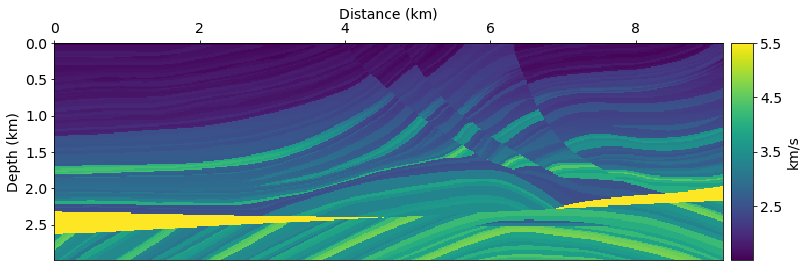

In [8]:
plot_vel(vel,h)

In [9]:
times=np.empty((nx,nx,nz),dtype=float32)

In [10]:
for isrc in range(nx):
    if isrc %50 ==0:
        print(isrc,nx)
    times[isrc]=traveltime(vel,h,isrc,0)
#times.tofile("ttime_marm_org.bin")
#times=np.fromfile("ttime_marm_org.bin",dtype=float32)
#times.shape=(nx,nx,nz)

0 576
50 576
100 576
150 576
200 576
250 576
300 576
350 576
400 576
450 576
500 576
550 576


In [11]:
image=kirchhoff(sd,h,times,0.1)

0 240
10 240
20 240
30 240
40 240
50 240
60 240
70 240
80 240
90 240
100 240
110 240
120 240
130 240
140 240
150 240
160 240
170 240
180 240
190 240
200 240
210 240
220 240
230 240


In [12]:
dimg=zdiff2(image)
dimg.min(),dimg.max()

(-2106035.8452745974, 2163344.2646015882)

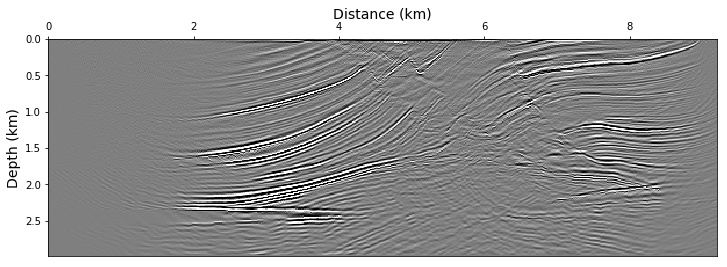

In [13]:
plot_mig(perc_clip(dimg,97),h)

# Kirchhoff prestack depth migration using a smooth velocity model

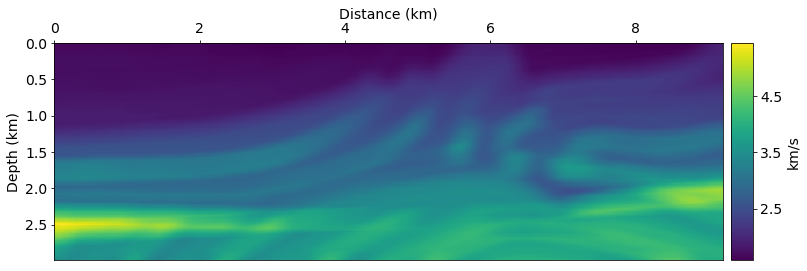

In [15]:
svel=moving_average2d(vel,10,10)
plot_vel(svel,h)

In [16]:
stimes=np.empty((nx,nx,nz),dtype=float32)
for isrc in range(nx):
    if isrc %50 ==0:
        print(isrc,nx)
    stimes[isrc]=traveltime(svel,h,isrc,0)
#stimes.tofile("ttime_marm_sm10.bin")
#stimes=np.fromfile("ttime_marm_sm10.bin",dtype=np.float32)
#stimes.shape=(nx,nx,nz)

0 576
50 576
100 576
150 576
200 576
250 576
300 576
350 576
400 576
450 576
500 576
550 576


In [17]:
simage=kirchhoff(sd,h,stimes,0.1)

0 240
10 240
20 240
30 240
40 240
50 240
60 240
70 240
80 240
90 240
100 240
110 240
120 240
130 240
140 240
150 240
160 240
170 240
180 240
190 240
200 240
210 240
220 240
230 240


In [18]:
dsimg=zdiff2(simage)
dsimg.min(),dsimg.max()

(-1645755.741578132, 1576753.958869338)

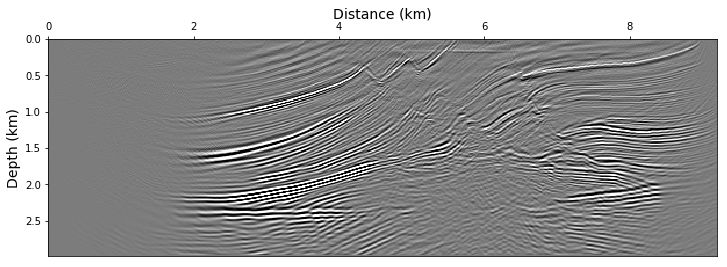

In [19]:
plot_mig(perc_clip(dsimg,97),h)